In [3]:
import pandas as pd
data = pd.read_csv('API_score.csv')
data = data.values
print(data)

[[ 0.2         0.1649905   0.98556757  0.877939  ]
 [ 0.30000001  0.85399306  0.86355823  0.828761  ]
 [ 0.30000001  0.99476975  0.5         0.675472  ]
 [ 0.          0.94807804  0.5         0.761142  ]
 [ 0.2         0.99743611  0.76881218  0.366428  ]
 [ 0.          0.9989506   0.86195618  0.543569  ]
 [ 0.          0.97733784  0.5        -0.516176  ]
 [-0.1         0.98780417  0.5        -0.490383  ]
 [ 0.5         0.91680908  0.93290031  0.971096  ]
 [ 0.80000001  0.9969855   0.95537889  0.972526  ]
 [ 0.30000001  0.99078345  0.91674507  0.493107  ]
 [ 0.60000002  0.95547205  0.5         0.863715  ]
 [ 0.30000001  0.9593178   0.5         0.775077  ]
 [ 0.40000001  0.9722839   0.8877207   0.769903  ]
 [ 0.30000001  0.83534259  0.5         0.69456   ]
 [ 0.30000001  0.98777103  0.92822576  0.896242  ]
 [ 0.40000001  0.98190051  0.5         0.939245  ]
 [ 0.2         0.99663639  0.5         0.792804  ]
 [ 0.80000001  0.9843837   0.5         0.832673  ]
 [ 0.5         0.99091703  0.5 

In [4]:
import json
import keras
import numpy as np
from sklearn.model_selection import train_test_split
num_classes = 3
jsonfile = open('Team5_Microsoft.json')
jsondata = jsonfile.read()
textdata = json.loads(jsondata)
label = list(textdata['sentiment'].values())
label = np.asarray(label)
label = keras.utils.to_categorical(label, num_classes)
x_train,x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

Using TensorFlow backend.


(142, 4) (36, 4)
(142, 3) (36, 3)


In [5]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
automl = autosklearn.classification.AutoSklearnClassifier()
history = automl.fit(x_train, y_train)

import matplotlib.pyplot as plt

scores = automl.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


[WARNING] [2019-03-21 19:27:10,122:EnsembleBuilder(1):3aaa4fbfe88351b04a0c21a86c798708] No models better than random - using Dummy Score!
[WARNING] [2019-03-21 19:27:10,132:EnsembleBuilder(1):3aaa4fbfe88351b04a0c21a86c798708] No models better than random - using Dummy Score!
[WARNING] [2019-03-21 19:27:40,574:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-03-21 19:27:40,574:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-03-21 19:35:53,646:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-03-21 19:35:53,646:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


AttributeError: 'AutoSklearnClassifier' object has no attribute 'evaluate'

In [7]:
pred = automl.predict(x_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, pred))

Accuracy score 0.75


<Figure size 432x288 with 0 Axes>

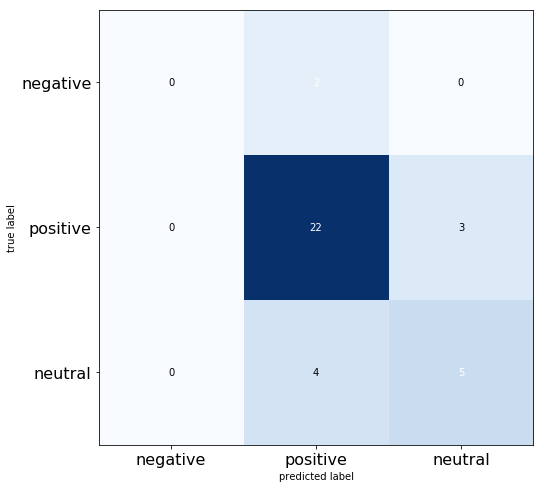

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_label = np.argmax(y_test, axis=1)
pred = np.argmax(pred, axis=1)
cm=confusion_matrix(test_label, pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.yticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.show()


<Figure size 432x288 with 0 Axes>

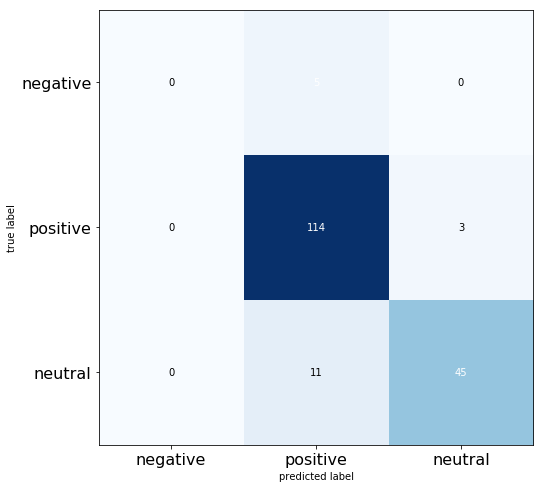

In [16]:
pred = automl.predict(data)
total_label = np.argmax(label, axis=1)
pred = np.argmax(pred, axis=1)
cm=confusion_matrix(total_label, pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.yticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.show()